In [45]:
import numpy as np
from six.moves import urllib
from sklearn.datasets import fetch_mldata
from scipy.io import loadmat

#mnist = fetch_mldata('MNIST original')
# import tensorflow.examples.tutorials.mnist.input_data as input_data
# m=input_data.read_data_sets('MNIST')
# m.train.images
# a = len(m.train.images)
# print(a)

# from six.moves import urllib
# from sklearn.datasets import fetch_mldata
# try:
#     mnist = fetch_mldata('MNIST original')
# except urllib.error.HTTPError as ex:
#     print("Could not download MNIST data from mldata.org, trying alternative...")

#     # Alternative method to load MNIST, if mldata.org is down
#     from scipy.io import loadmat
#     mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
#     mnist_path = "./mnist-original.mat"
#     response = urllib.request.urlopen(mnist_alternative_url)
#     with open(mnist_path, "wb") as f:
#         content = response.read()
#         f.write(content)
#     mnist_raw = loadmat(mnist_path)
#     mnist = {
#         "data": mnist_raw["data"].T,
#         "target": mnist_raw["label"][0],
#         "COL_NAMES": ["label", "data"],
#         "DESCR": "mldata.org dataset: mnist-original",
#     }
#     print("Success!")

mnist_path = './mnist-original.mat'
mnist_raw = loadmat(mnist_path)
mnist = {
    'data': mnist_raw['data'].T,
    'target': mnist_raw['label'][0],
    'COL_NAMES': ['label', 'data'],
    'DESCR': 'mldata.org dataset: mnist-original',
}
print("Success!")

Success!


In [46]:
display(mnist['data'].shape)
display(mnist['target'].shape)

(70000, 784)

(70000,)

In [47]:
X = mnist['data'] / 255.0    # scaling the data to (0,1)
y = mnist['target']

In [48]:
import pandas as pd
feat_cols = ['pixel-'+str(i) for i in range(X.shape[1])]
# display(feat_cols)
df = pd.DataFrame(X, columns=feat_cols)
display(df.head())
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))
display(df.head())
X,y = None, None
randomidx = np.random.permutation(df.shape[0])
display(randomidx)

,pixel-0,pixel-1,pixel-2,pixel-3,pixel-4,pixel-5,pixel-6,pixel-7,pixel-8,pixel-9,...,pixel-774,pixel-775,pixel-776,pixel-777,pixel-778,pixel-779,pixel-780,pixel-781,pixel-782,pixel-783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,pixel-0,pixel-1,pixel-2,pixel-3,pixel-4,pixel-5,pixel-6,pixel-7,pixel-8,pixel-9,...,pixel-775,pixel-776,pixel-777,pixel-778,pixel-779,pixel-780,pixel-781,pixel-782,pixel-783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([12517, 13661, 50208, ..., 44616, 67578, 67263])

<Figure size 432x288 with 0 Axes>

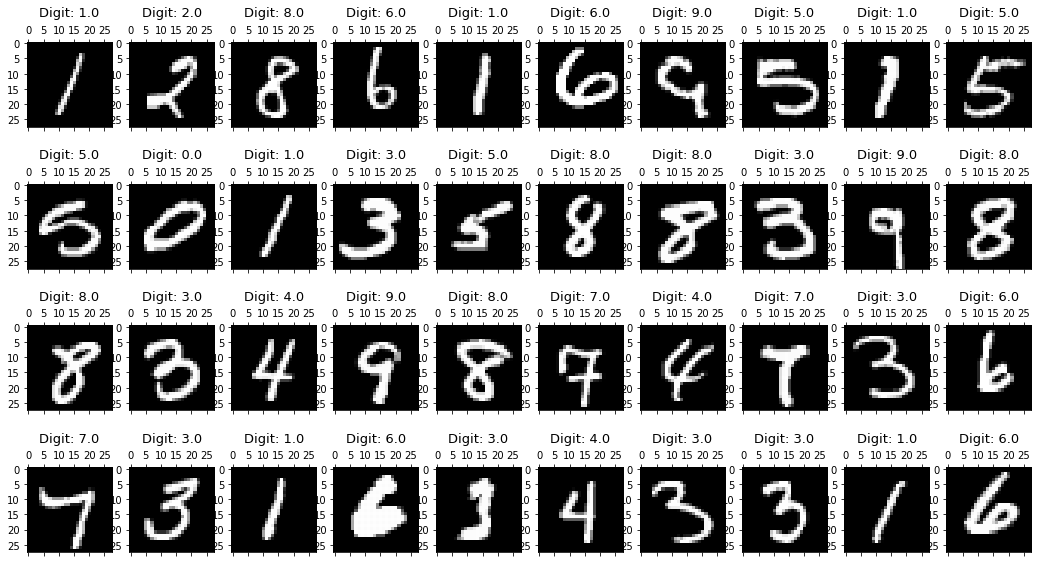

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure(figsize=(18,10))
for i in range(40):
    ax = fig.add_subplot(4, 10, i+1)  # df.loc['rows', 'cols']
    plt.text(0.5, 1.3, 'Digit: '+str(df.loc[randomidx[i], 'label']),
         horizontalalignment='center',
         fontsize=13,
         transform = ax.transAxes)
    ax.matshow(df.loc[randomidx[i], feat_cols].values.reshape((28,28)).astype(float))

plt.show()

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
display(df.head())
pca_results = pca.fit_transform(df[feat_cols].values)
#display(pca_results)
df['pca_one'] = pca_results[:, 0]
df['pca_two'] = pca_results[:, 1]
df['pca_three'] = pca_results[:, 2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_.cumsum()))


,pixel-0,pixel-1,pixel-2,pixel-3,pixel-4,pixel-5,pixel-6,pixel-7,pixel-8,pixel-9,...,pixel-778,pixel-779,pixel-780,pixel-781,pixel-782,pixel-783,label,pca_one,pca_two,pca_three
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.962725,-1.137129,2.259341
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.053183,-1.377213,1.954543
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.413439,-0.957802,2.466931
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.694989,-0.962422,3.404838
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.454247,-0.316526,-0.755313


Explained variation per principal component: [0.09746116 0.07155445 0.06149531]
Explained variation per principal component: [0.09746116 0.16901561 0.23051091]


In [108]:
axes_pca_one = df.loc[randomidx[:30000], 'pca_one']
axes_pca_two = df.loc[randomidx[:30000], 'pca_two']
label = df.loc[randomidx[:30000], 'label']
# display(axes_pca_one)
# display(axes_pca_two)

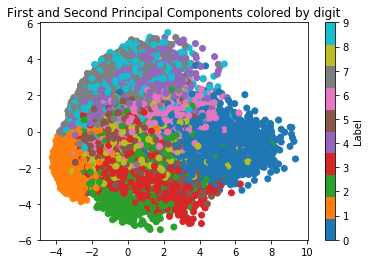

In [131]:
plt.scatter(axes_pca_one, axes_pca_two, c=label, cmap='tab10')
plt.title('First and Second Principal Components colored by digit')
clb = plt.colorbar()
clb.set_label('Label')
plt.show()

In [132]:
# dimension reduction using t-sne
import time
from sklearn.manifold import TSNE

n_sne = 10000
start = time.time()
tsne = TSNE(n_components=2, perplexity=40, n_iter=600, verbose=3)
tsne_result = tsne.fit_transform(df.loc[randomidx[:n_sne], feat_cols].values)
print('t-SNE done! Time elapsed: ', time.time()-start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.495s...
[t-SNE] Computed neighbors for 10000 samples in 145.575s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.120721
[t-SNE] Computed conditional probabilities in 0.725s
[t-SNE] Iteration 50: error = 93.6386185, gradient norm = 0.0002766 (50 iterations in 32.841s)
[t-SNE

(10000, 788)

(10000, 2)

,pixel-0,pixel-1,pixel-2,pixel-3,pixel-4,pixel-5,pixel-6,pixel-7,pixel-8,pixel-9,...,pixel-780,pixel-781,pixel-782,pixel-783,label,pca_one,pca_two,pca_three,x_tsne,y_tsne
12517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-3.402554,-2.011503,0.210692,1.772231,-38.668488
13661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,-0.635674,-0.358491,2.833578,-29.385942,-27.609661
50208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,-0.773194,-1.564905,-0.416773,-0.537692,-6.381800
40089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,-1.304364,-0.648187,0.208155,-19.854803,27.778215
10843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-3.999052,-1.529911,0.363024,14.779782,-36.504101


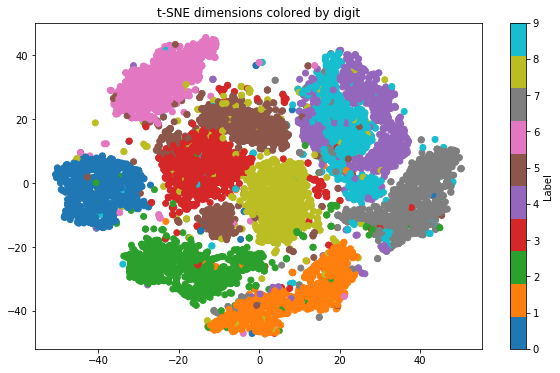

In [145]:
df_tsne = df.loc[randomidx[:n_sne], :].copy()
display(df_tsne.shape)
display(tsne_result.shape)

df_tsne['x_tsne'] = tsne_result[:, 0]
df_tsne['y_tsne'] = tsne_result[:, 1]
display(df_tsne.head())
plt.figure(figsize=(10,6))
plt.scatter(df_tsne['x_tsne'], df_tsne['y_tsne'], c=df_tsne['label'], cmap='tab10')
plt.title('t-SNE dimensions colored by digit')
clb = plt.colorbar()
clb.set_label('Label')

plt.show()

In [148]:
pca_50 = PCA(n_components=50)
pca_results_50 = pca_50.fit_transform(df[feat_cols].values)
display(type(pca_results_50))
print('Explained variation per principal component: {}'.format(pca_50.explained_variance_ratio_))
print('Explained variation per principal component: {}'.format(pca_50.explained_variance_ratio_.cumsum()))

numpy.ndarray

Explained variation per principal component: [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934 0.04305227
 0.03278262 0.02889642 0.02758364 0.0234214  0.02106689 0.02037553
 0.01707064 0.0169402  0.01583382 0.01486345 0.01319358 0.01279014
 0.01187272 0.01152937 0.0106604  0.01009794 0.00959151 0.00909635
 0.00883287 0.00838818 0.00809832 0.00785718 0.00740262 0.00690014
 0.00656144 0.0064547  0.00600819 0.00585611 0.00566753 0.00543469
 0.00504705 0.00487061 0.00478945 0.00467569 0.0045431  0.00444906
 0.00418196 0.00396073 0.00383661 0.00375676 0.00360178 0.00347698
 0.00337609 0.00319078]
Explained variation per principal component: [0.09746116 0.16901561 0.23051091 0.28454476 0.3334341  0.37648637
 0.40926898 0.4381654  0.46574904 0.48917044 0.51023733 0.53061286
 0.5476835  0.5646237  0.58045752 0.59532097 0.60851456 0.6213047
 0.63317742 0.64470679 0.65536719 0.66546513 0.67505665 0.684153
 0.69298586 0.70137405 0.70947236 0.71732954 0.72473217 0.73163231
 0.73819374 0.7446

In [149]:
n_sne = 10000
start = time.time()
tsne = TSNE(n_components=2, perplexity=40, n_iter=600, verbose=3)
tsne_result = tsne.fit_transform(pca_results_50[randomidx[:n_sne], :])
print('t-SNE done! Time elapsed: ', time.time()-start)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.060s...
[t-SNE] Computed neighbors for 10000 samples in 19.233s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.835372
[t-SNE] Computed conditional probabilities in 0.700s
[t-SNE] Iteration 50: error = 94.0227661, gradient norm = 0.0006067 (50 iterations in 25.098s)
[t-SNE]

(10000, 788)

(10000, 2)

,pixel-0,pixel-1,pixel-2,pixel-3,pixel-4,pixel-5,pixel-6,pixel-7,pixel-8,pixel-9,...,pixel-780,pixel-781,pixel-782,pixel-783,label,pca_one,pca_two,pca_three,x_pca_tsne,y_pca_tsne
12517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-3.402554,-2.011503,0.210692,-13.929883,42.648151
13661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,-0.635674,-0.358491,2.833578,-38.571789,19.311468
50208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,-0.773194,-1.564905,-0.416773,-2.850848,2.476066
40089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,-1.304364,-0.648187,0.208155,-28.759718,-13.752022
10843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-3.999052,-1.529911,0.363024,-4.407900,34.333324


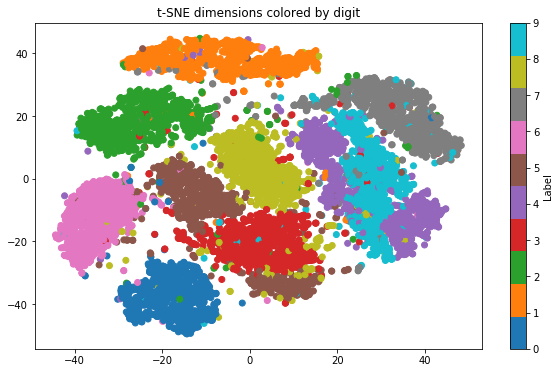

In [151]:
df_pca_tsne = df.loc[randomidx[:n_sne], :].copy()
display(df_pca_tsne.shape)
display(tsne_result.shape)

df_pca_tsne['x_pca_tsne'] = tsne_result[:, 0]
df_pca_tsne['y_pca_tsne'] = tsne_result[:, 1]
display(df_pca_tsne.head())
plt.figure(figsize=(10,6))
plt.scatter(df_pca_tsne['x_pca_tsne'], df_pca_tsne['y_pca_tsne'], c=df_pca_tsne['label'], cmap='tab10')
plt.title('t-SNE dimensions colored by digit')
clb = plt.colorbar()
clb.set_label('Label')

plt.show()